In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a = 5

In [ ]:
b = 6

In [ ]:
print(a+b)

11


In [ ]:
c = 'this is string'

In [ ]:
print(c)

this is string


In [ ]:
str(a) + ", " + c

'5, this is string'

#introduction to looping

In [ ]:
for i in range(10):
    print(a+i)

5
6
7
8
9
10
11
12
13
14


<h1>1. READ AND CLEANING DATA</h1>

In [ ]:
#how to read data in google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1GZ7VWFzb8cDA-WF0CT9LmL3ZHKogpQGX1F2TLkRRcoA/edit#gid=1422988365'
sheet_url_trf = sheet_url.replace('/edit#gid=', "/export?format=csv&gid=")
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df

https://docs.google.com/spreadsheets/d/1GZ7VWFzb8cDA-WF0CT9LmL3ZHKogpQGX1F2TLkRRcoA/export?format=csv&gid=1422988365


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7
...,...,...,...,...,...,...,...,...,...,...
995,1/29/2019,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1
996,3/2/2019,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10
997,2/9/2019,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1
998,2/22/2019,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [ ]:
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [ ]:
#changing type from object to date
df_clean = df.copy()
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Revenue'] = df_clean['Unit price'] * df_clean['Quantity']

print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
#check df_clean columns
df_clean.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity', 'Revenue'],
      dtype='object')

In [ ]:
#check typo on columns

df_clean['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
#check typo using looping
for column_name in ['Payment', 'Branch', 'City', 'Customer type', 'Gender', 'Product line']:
    print(df_clean[column_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [ ]:
#how to replace data from csv
dict_typo = {'male' : 'Male', 'female' : 'Female', 'fml' : 'Female'}

df_replaced = df_clean.replace(dict_typo)
df_replaced.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
df_replaced['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
df_replaced['Invoice ID'].duplicated().sum()

0

<h1>2. EXPLORATORY DATA ANALYSIS</h1>

<b>daily trend overall</b>

In [ ]:
agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()
agg_daily

<ipython-input-21-bc3bdb7d1218>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replaced.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55
...,...,...,...
84,2019-03-26,1869.06,52
85,2019-03-27,2764.59,45
86,2019-03-28,2123.24,48
87,2019-03-29,3831.66,54


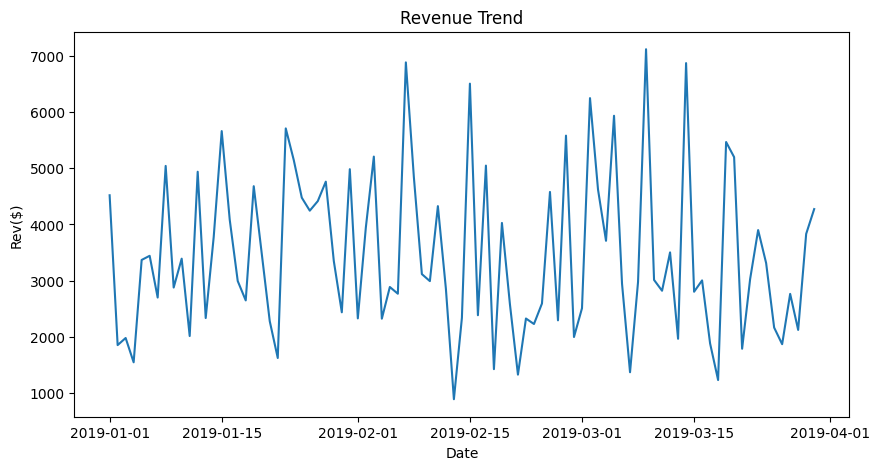

In [ ]:
#creating plot chart using matplotlib.pyplot
plt.rcParams['figure.figsize'] = (10,5)

plt.plot('Date', 'Revenue', data=agg_daily)
plt.title('Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

Revenue has seasonality

<Axes: xlabel='Date', ylabel='Quantity'>

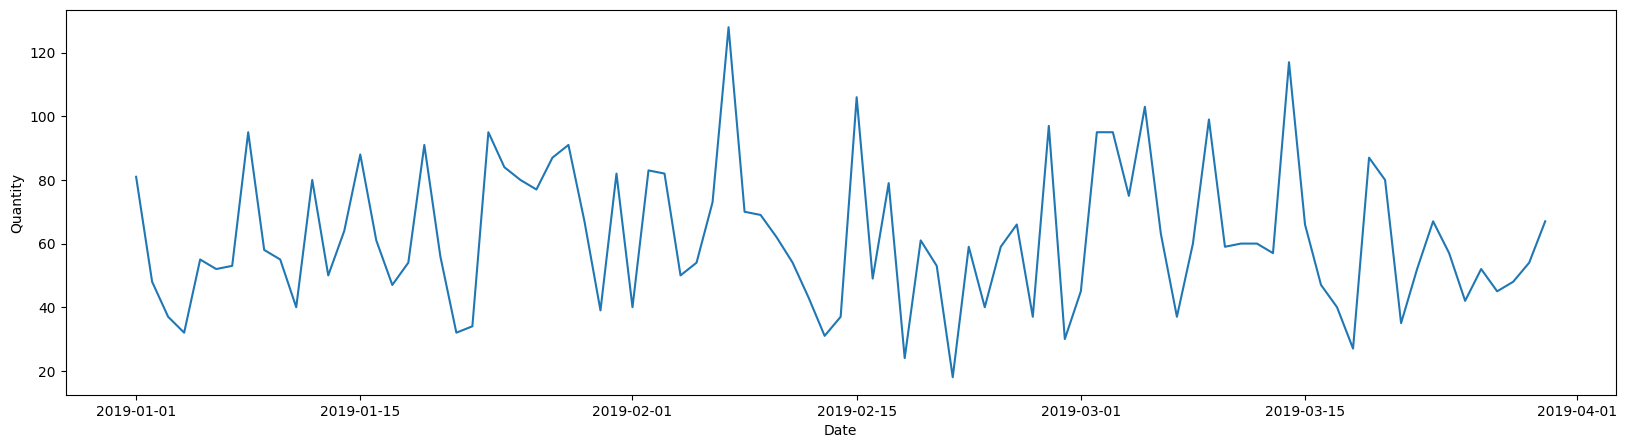

In [ ]:
#creating line plot using seaborn
sns.lineplot(data = agg_daily, x = 'Date', y = 'Quantity')

By Payment

In [ ]:
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue' : 'sum', 'Invoice ID' :'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


<Axes: xlabel='Payment', ylabel='Revenue'>

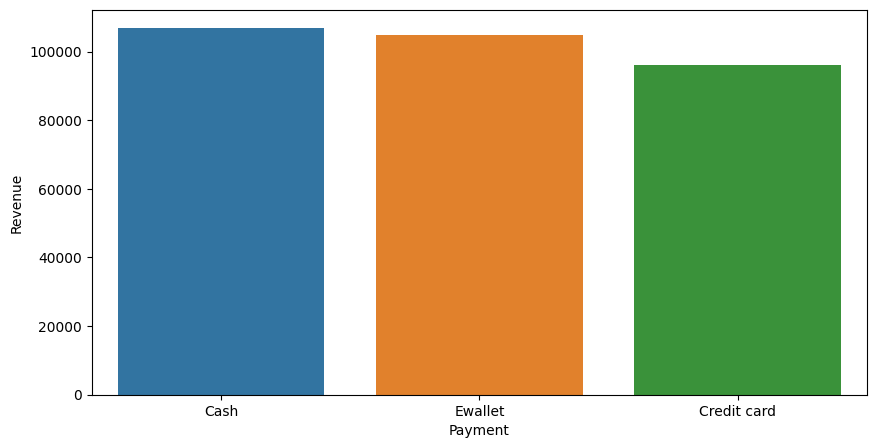

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data = agg_payment.sort_values('Revenue', ascending=False), x = 'Payment', y = 'Revenue')

Highest Revenue = Cash

<Axes: xlabel='Payment', ylabel='Invoice ID'>

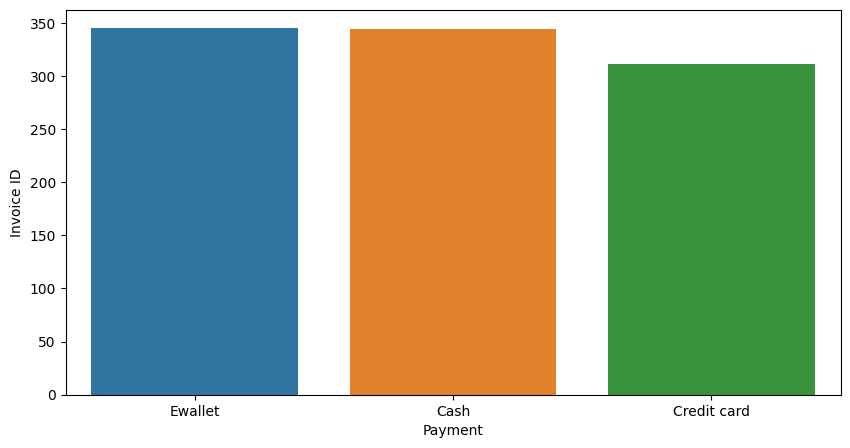

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data = agg_payment.sort_values('Invoice ID', ascending=False), x = 'Payment', y = 'Invoice ID')

Most transactions were made using E-Wallet

([<matplotlib.patches.Wedge at 0x7fc01469d420>,
 [Text(0.5073032188378986, 0.976034550698236, 'Cash'),
  Text(-1.0997450371451651, -0.023682340986048763, 'Credit card'),
  Text(0.5281991633287692, -0.9648863372743903, 'Ewallet')],
 [Text(0.27671084663885376, 0.5323824821990377, '34.7%'),
  Text(-0.5998609293519083, -0.012917640537844778, '31.2%'),
  Text(0.288108634542965, -0.5263016385133037, '34.1%')])

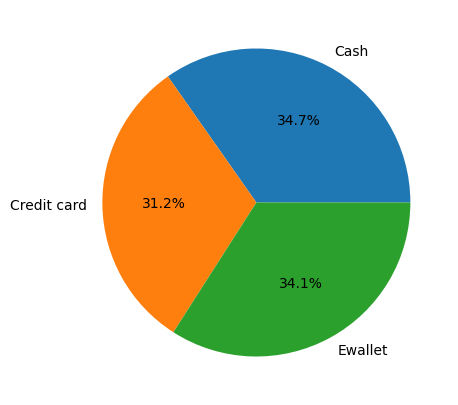

In [ ]:
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'], autopct='%1.1f%%')


Cash volume = 34.7%
diatas 0.6% dari Ewallet dan diatas 3.5% dari Credit Card

BY GENDER AND PRODUCT TYPE

In [ ]:
agg_gender = df_replaced.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gender.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


<Axes: xlabel='Product line', ylabel='Invoice ID'>

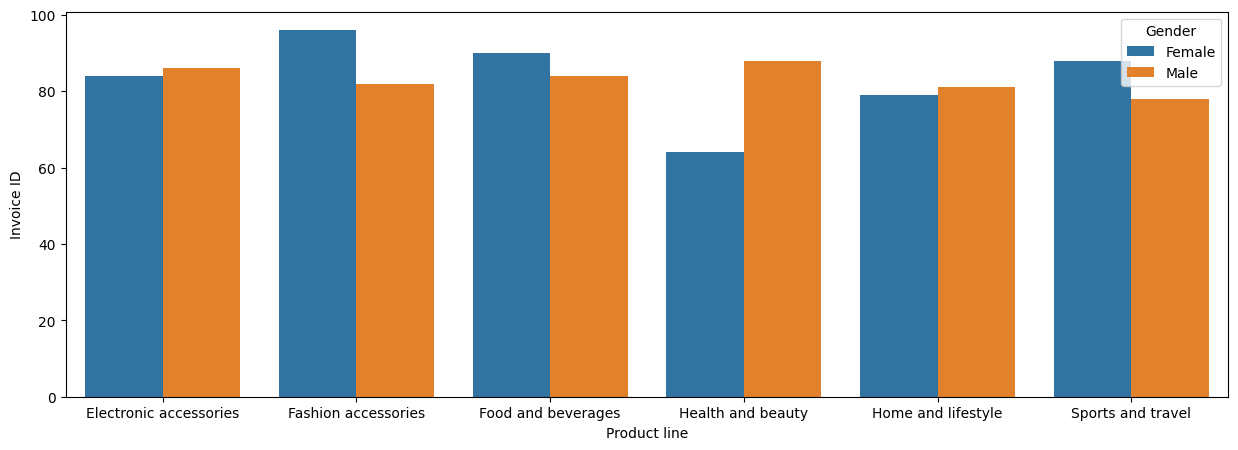

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(data = agg_gender, hue = 'Gender', x = 'Product line', y = 'Invoice ID')

1. More males is buying electronic accessories products
2. More female is buying fashion accessories products
3. More female is buying food and beverages products
4. More male is buying health and beauty products
5. More male is buying home and lifestyle products
6. More female is buying sports and travel products